In [186]:
import sys
import os
import time
import datetime

%load_ext autoreload
%autoreload 2

sys.path.append(os.path.join(os.environ['HOMEDRIVE'], os.environ['HOMEPATH'], 'documents\github\coinbase'))

from Trader import Trader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fee curve

In [207]:
transaction_amount = list(range(1,1000,1))
fees_dollar = list()
fees_pct = list()

In [208]:
for t in transaction_amount:
    if t <= 10:
        ff = 0.99
    elif t <= 25:
        ff = 1.49
    elif t <= 50:
        ff = 1.99
    elif t <= 200:
        ff = 2.99
    
    f = 0.0149 * t
    
    fee_dollar = max(f, ff)
    fee_pct = fee_dollar / t
    
    fees_dollar.append(fee_dollar)
    fees_pct.append(fee_pct)

In [210]:
import matplotlib.pyplot as plt

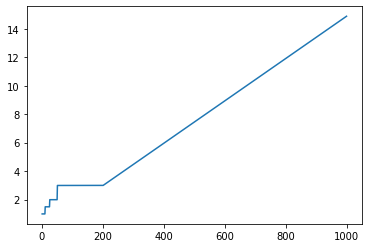

In [211]:
plt.plot(transaction_amount, fees_dollar)

(0, 300)

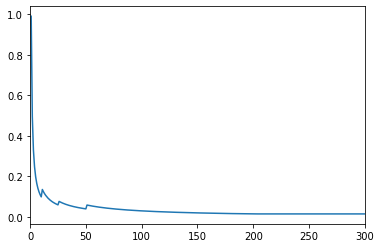

In [272]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(transaction_amount, fees_pct)
ax.set_xlim(0,300)

In [220]:
import pandas as pd

In [223]:
fee_curve = pd.DataFrame({'t': transaction_amount, 'pct':fees_pct, 'dollar':fees_dollar})

In [266]:
trader = Trader()

chunk_size_eth = 1
chunk_size_usd = 250 / trader.getBuyQuote('BTC', 1)[0]

In [270]:
(5/250) * 33632

672.64

In [267]:
chunk_size_usd

0.007207350575045674

In [261]:
buy_order = trader.buy('ETH', 0.01)

Buying 0.01 of ETH: $13.85 + $1.49 = USD$15.3400


In [262]:
buy_order.total.amount

'15.34'

In [263]:
buy_order.amount.amount

'0.01000000'

In [256]:
sell_order = trader.sell('ETH', 0.01)

Selling 0.01 of ETH: $13.71 - $1.49 = USD$12.2200


In [260]:
sell_order.amount.amount

'0.01000000'

In [255]:
sell_order.total.amount

'12.24'

In [248]:
import numpy as np

In [2]:
trader = Trader()

In [116]:
trader.printBalances()

USD: 19.3800
ALGO: 7.2155
BCH: 0.0002
BSV: 0.0536
BTC: 0.0006
CGLD: 2.0760
EOS: 1.9354
ETH: 0.0150
XLM: 9.0503
XTZ: 3.7380


In [163]:
chunk_size = 1

In [181]:
lastBuyCost = trader.getBuyQuote('ETH', chunk_size)[0]
lastSellProceeds = trader.getSellQuote('ETH', chunk_size)[0]

print('Last bought at ${:.2f}'.format(lastBuyCost))
print('Last sold at ${:.2f}'.format(lastSellProceeds))

Last bought at $1386.63
Last sold at $1332.47


In [182]:
newSellProceeds = newBuyProceeds = -1
while (newSellProceeds < 0) & (newBuyProceeds < 0):
    sell_quote = trader.getSellQuote('ETH', chunk_size)
    if sell_quote is not None:
        sell_quote = sell_quote[0]
        tmp = sell_quote - lastBuyCost
        if tmp > (newSellProceeds + abs(newSellProceeds)*0.1):
            print('ETH sell price (${:.2f}) rising: Sell proceeds would now be ${:.2f}'.format(sell_quote, tmp))
        newSellProceeds = tmp
    
    buy_quote = trader.getBuyQuote('ETH', chunk_size)
    if buy_quote is not None:
        buy_quote = buy_quote[0]
        tmp = lastSellProceeds - buy_quote
        if tmp > (newBuyProceeds + abs(newBuyProceeds)*0.1):
            print('ETH buy price (${:.2f}) falling: Buy proceeds would now be ${:.2f}'.format(buy_quote, tmp))
        newBuyProceeds = tmp
    
    time.sleep(5)
    
print('Profitable trade!')
print('New sell would generate ${:.2f}'.format(newSellProceeds))
print('New buy would generate ${:.2f}'.format(newBuyProceeds))

KeyboardInterrupt: 

In [138]:
print('Profitable trade!')
print('New sell would generate ${:.2f}'.format(newSellProceeds))
print('New buy would generate ${:.2f}'.format(newBuyProceeds))

Profitable trade!
New sell would generate $-3.12
New buy would generate $-3.13


In [168]:
trader.getBuyQuote('ETH', 1)

(1383.85, 20.32)

In [156]:
1.49/15.13

0.09847984137475214

In [158]:
2.99/139.4

0.02144906743185079

In [160]:
20.34/1385.65

0.014679031501461407

In [162]:
203.34 / 13850.58

0.014680973648756947

In [153]:
sell_order = trader.sell('ETH', 1)

ValidationError: APIError(id=validation_error): You do not have enough ETH in this account.

In [113]:
buy_order = trader.buy('ETH', 0.015)

Buying 0.01 of ETH: $20.63 + $1.49 = USD$22.1200


In [114]:
trader.commit_buy(buy_order)